In [29]:
# imports
import altair as alt
import pandas as pd
import sys
import os
# altair specific
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')
# adds parent directory to this notebook, so it could use relative import
sys.path.append(os.path.dirname(os.getcwd()))

# user defined modules
from src.helpers import get_data


In [30]:
# read data here
data_path = "../data/player_raw_data.csv"
# this is raw data
fifa = get_data(data_path)
# this is processed for Task 5 specific
fifa_processed = get_data(data_path, preprocess=True)

Improvements Task 3:
- Try not to use color, since we only interested in checking correlation
- Have opacity filter when clicking
- Change size of points
- Careful with data size, the chart right now is using `data_size` * 0.5 of data points only, otherwise is too laggy
- Worse case scenario, use heatmap and compare changes to see which one is more persuasive of the task

In [35]:
fifa_processed.columns

Index(['name', 'country', 'region', 'age', 'overall', 'potential',
       'preferred_foot', 'skill_move', 'height', 'wage', 'dribbling',
       'ball_control', 'sprint_speed', 'strength', 'shot_power', 'stamina',
       'aggression'],
      dtype='object')

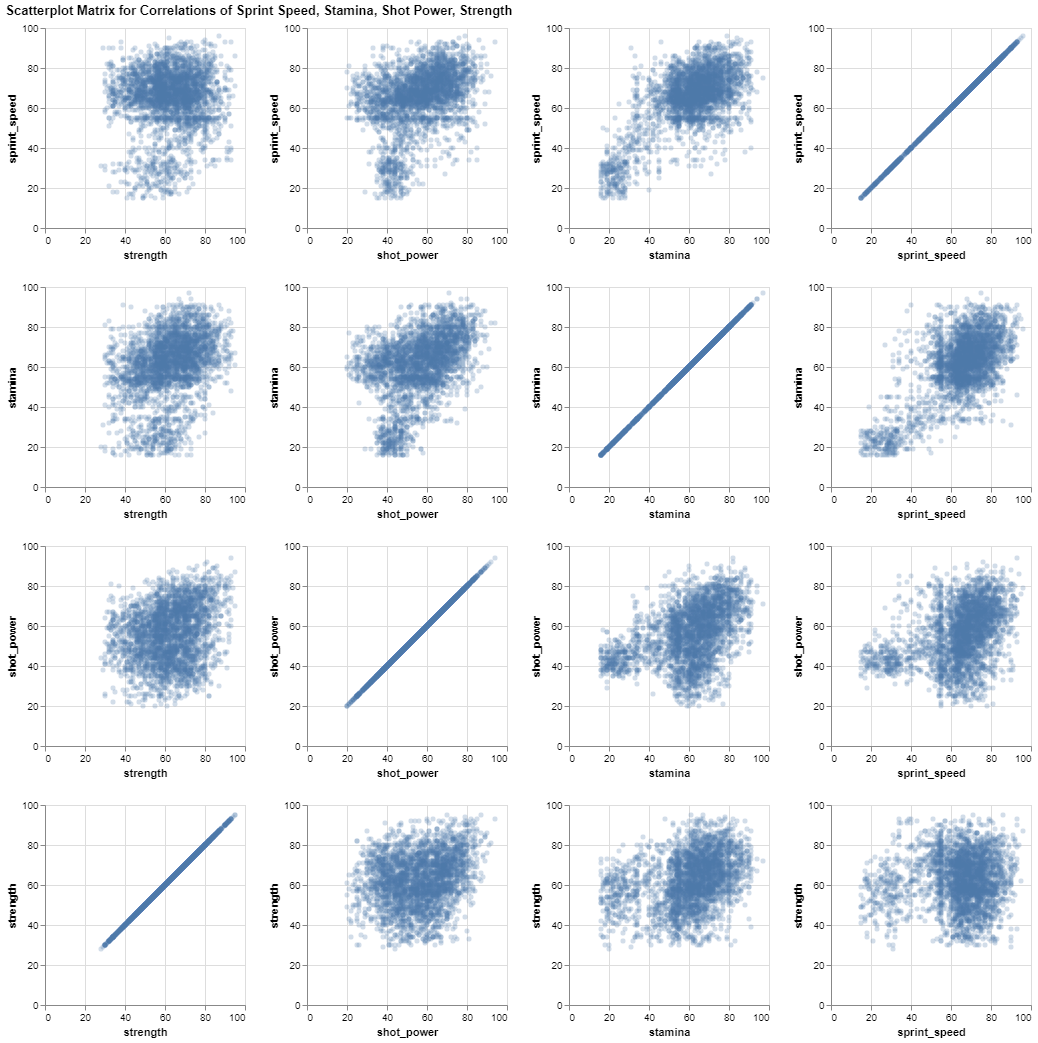

In [45]:
# 3. Explore/Compare correlation of sprint_speed & stamina, and shot power & strength or any other n variables of your interest
row_names = ["sprint_speed", "stamina", "shot_power", "strength"]

# input any number of variable names in list to display scatter matrix of those n variables
# default a frac of take that portion of data for visualization, default is 0.5
def task_three_viz(data, attributes, frac=0.5):
    # user-picked attributes to visualize
    col_names = list(reversed(attributes))

    # visualization of scatter matrix

    # parameter to control sample fraction 
    data_sample = data.sample(frac=frac, random_state=20230327)
    scatter_matrix_n_attr = alt.Chart(data_sample).mark_circle(opacity=0.25, size = 25).encode(
        x = alt.X(alt.repeat("column"), type="quantitative"),
        y = alt.Y(alt.repeat("row"), type="quantitative")
    ).properties(
        width=200,
        height=200
    ).repeat(
        row = attributes,
        column = col_names,
        title=f"Scatterplot Matrix for Correlations of {', '.join(attributes).replace('_', ' ').title()}"
    )
    return scatter_matrix_n_attr

t3_plot = task_three_viz(data=fifa_processed, attributes=row_names, frac=0.25)
t3_plot